# Training model on Northern Lights

## EDA on the database

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2


#### Loading Data


In [8]:
df=pd.read_csv('oath_v1.1/classifications/classifications-edited.csv')
df.head()


,class2,class6,picNum,picType,rotAng
0,0,2,1,discrete,334
1,0,2,2,discrete,29
2,0,2,3,discrete,355
3,0,0,4,arc,118
4,0,0,5,arc,55


In [9]:
df.describe()

,class2,class6,picNum,rotAng
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,0.437500,2.459478,2912.500000,175.072974
std,0.496121,1.658374,1681.388315,103.923438
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1456.750000,86.000000
50%,0.000000,2.000000,2912.500000,169.000000
75%,1.000000,4.000000,4368.250000,265.000000
max,1.000000,5.000000,5824.000000,358.000000


In [10]:
df['picType'].value_counts()

discrete    1400
diffuse     1102
noaurora    1082
cloudy       852
arc          774
moon         614
Name: picType, dtype: int64

#### Count Plot on the Basis of PicType

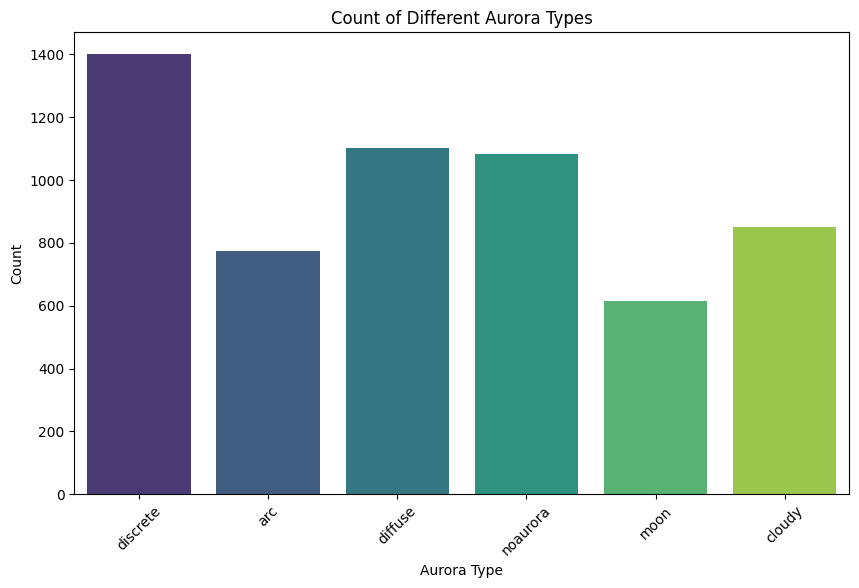

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='picType', data=df, hue='picType', palette='viridis', dodge=False, legend=False)
plt.title('Count of Different Aurora Types')
plt.xlabel('Aurora Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

#### BoxPlot of Aurora Types w.r.t Rotational Angle of Images

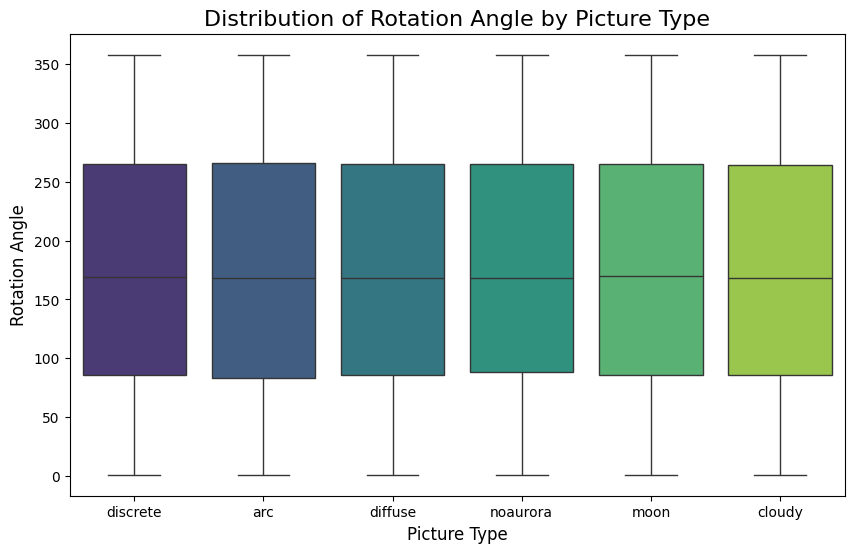

In [12]:
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the distribution of rotAng for each picType
sns.boxplot(x='picType', y='rotAng', data=df,  hue='picType',palette='viridis', dodge=False, legend=False)

# Add labels and title
plt.title('Distribution of Rotation Angle by Picture Type', fontsize=16)
plt.xlabel('Picture Type', fontsize=12)
plt.ylabel('Rotation Angle', fontsize=12)

# Display the plot
plt.show()

#### Distribution of Class2 by Picture Type

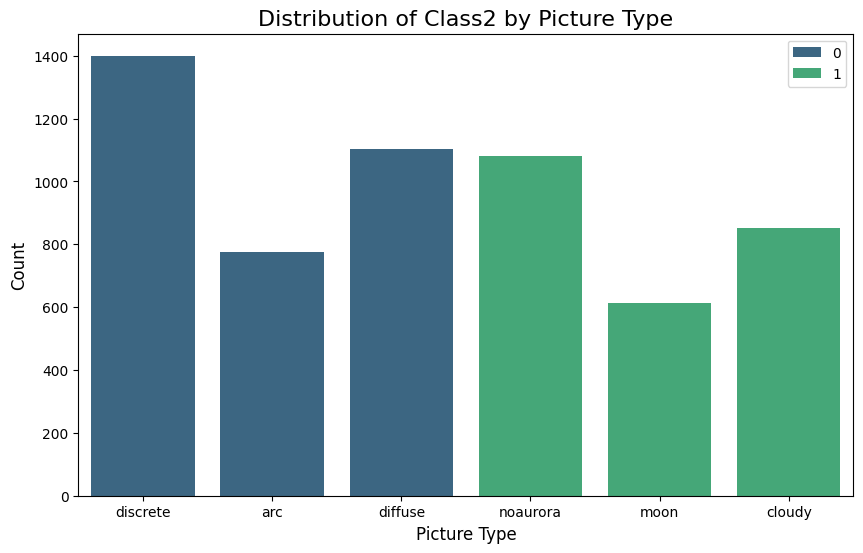

In [13]:
plt.figure(figsize=(10, 6))

# Create a count plot to visualize the distribution of class2 for each picType
sns.countplot(x='picType', hue='class2', data=df,palette='viridis', dodge=False, legend=False)

# Add labels and title
plt.title('Distribution of Class2 by Picture Type', fontsize=16)
plt.xlabel('Picture Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend([0,1])

# Display the plot
plt.show()

#### Correlatiom Matrix (Heat Map)

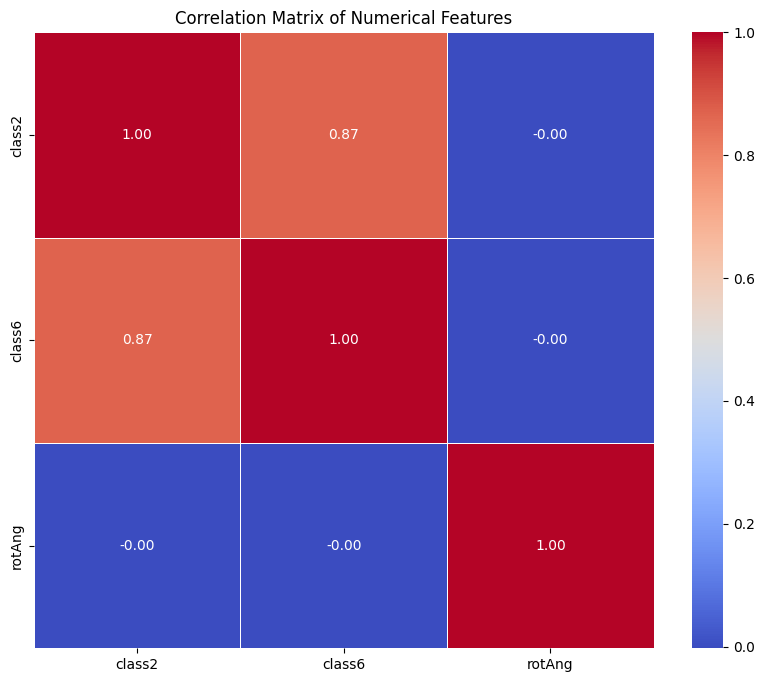

In [14]:
# Selecting features to include in the correlation matrix
features_to_include = df[['class2', 'class6', 'rotAng']]

# Compute the correlation matrix
corr_matrix = features_to_include.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Feature Extraction on Pictures

Original image shape: (256, 256, 3)
Resized image shape: (128, 128, 3)


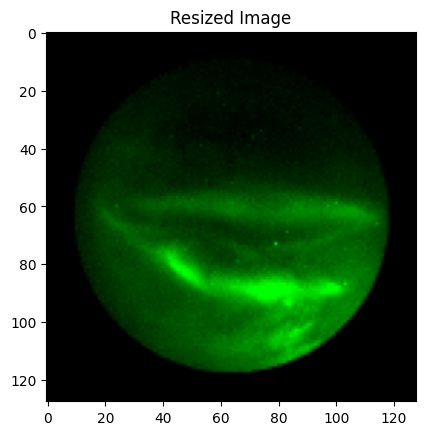

In [15]:
image_path = "oath_v1.1/images/cropped_scaled/00001.png"
image = cv2.imread(image_path)

# Original image dimensions
print("Original image shape:", image.shape)

# Resize image to a smaller size (e.g., 128x128)
resized_image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)

# Check new image dimensions
print("Resized image shape:", resized_image.shape)

# Display resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()

### GLCM Feature Extraction

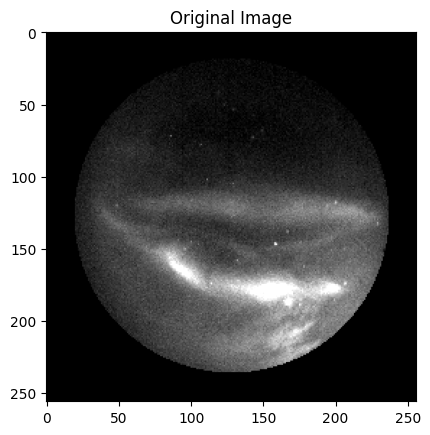

Contrast: [[43.40585172 56.02875817 48.28841912 48.53720877]]
Dissimilarity: [[3.60150123 3.86236063 3.73238358 3.8142253 ]]
Homogeneity: [[0.51909786 0.51305655 0.51807482 0.5134784 ]]
Energy: [[0.42846576 0.42532771 0.42891918 0.42534247]]
Correlation: [[0.97802682 0.97168567 0.97555514 0.97547155]]


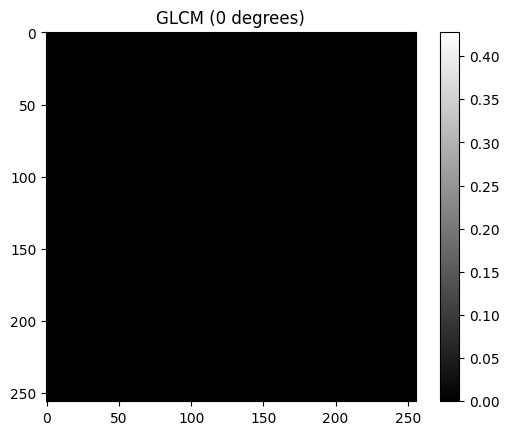

In [16]:
from skimage.feature import graycomatrix, graycoprops

image_path = 'oath_v1.1/images/cropped_scaled/00001.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Define the distances and angles for GLCM computation
distances = [1]  # Distance between pixel pairs
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, and 135 degrees

# Compute GLCM
glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Extract texture properties from GLCM
contrast = graycoprops(glcm, prop='contrast')
dissimilarity = graycoprops(glcm, prop='dissimilarity')
homogeneity = graycoprops(glcm, prop='homogeneity')
energy = graycoprops(glcm, prop='energy')
correlation = graycoprops(glcm, prop='correlation')

print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")

# Visualize the GLCM for a specific angle (e.g., 0 degrees)
glcm_0_deg = glcm[:, :, 0, 0]  # Extract GLCM at distance=1, angle=0 degrees

# Plot the GLCM
plt.imshow(glcm_0_deg, cmap='gray')
plt.title('GLCM (0 degrees)')
plt.colorbar()
plt.show()

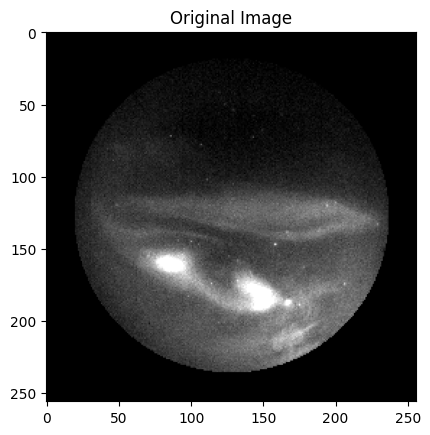

Contrast: [[34.02208946 43.93045752 38.06522672 38.43497116]]
Dissimilarity: [[3.19650735 3.4200692  3.31706495 3.38958862]]
Homogeneity: [[0.52881463 0.52407596 0.52619267 0.52298314]]
Energy: [[0.42884812 0.42534741 0.42925707 0.42545112]]
Correlation: [[0.97979638 0.97395653 0.97739541 0.97721444]]


In [17]:
from skimage.feature import graycomatrix, graycoprops

image_path = 'oath_v1.1/images/cropped_scaled/00002.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Define the distances and angles for GLCM computation
distances = [1]  # Distance between pixel pairs
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, and 135 degrees

# Compute GLCM
glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Extract texture properties from GLCM
contrast = graycoprops(glcm, prop='contrast')
dissimilarity = graycoprops(glcm, prop='dissimilarity')
homogeneity = graycoprops(glcm, prop='homogeneity')
energy = graycoprops(glcm, prop='energy')
correlation = graycoprops(glcm, prop='correlation')

print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")

# Visualize the GLCM for a specific angle (e.g., 0 degrees)
glcm_0_deg = glcm[:, :, 0, 0]  # Extract GLCM at distance=1, angle=0 degrees

# # Plot the GLCM
# plt.imshow(glcm_0_deg, cmap='gray')
# plt.title('GLCM (0 degrees)')
# plt.colorbar()
# plt.show()

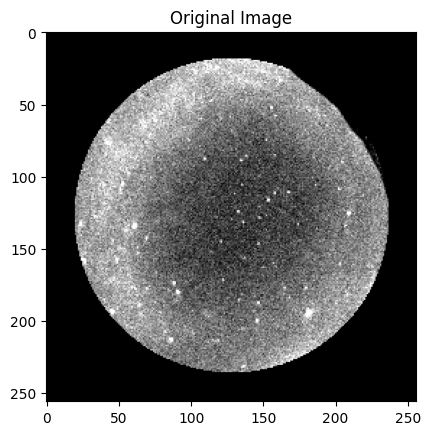

Contrast: [[366.08878676 412.17420992 379.37435662 404.98574394]]
Dissimilarity: [[10.99917279 11.37845444 11.07895221 11.40413687]]
Homogeneity: [[0.46348679 0.45879491 0.46393608 0.4589586 ]]
Energy: [[0.43223962 0.42852129 0.43220913 0.42861251]]
Correlation: [[0.90458343 0.89259186 0.90112071 0.8944651 ]]


In [18]:
from skimage.feature import graycomatrix, graycoprops

image_path = 'oath_v1.1/images/cropped_scaled/00207.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Define the distances and angles for GLCM computation
distances = [1]  # Distance between pixel pairs
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, and 135 degrees

# Compute GLCM
glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Extract texture properties from GLCM
contrast = graycoprops(glcm, prop='contrast')
dissimilarity = graycoprops(glcm, prop='dissimilarity')
homogeneity = graycoprops(glcm, prop='homogeneity')
energy = graycoprops(glcm, prop='energy')
correlation = graycoprops(glcm, prop='correlation')

print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")

# Visualize the GLCM for a specific angle (e.g., 0 degrees)
glcm_0_deg = glcm[:, :, 0, 0]  # Extract GLCM at distance=1, angle=0 degrees

# # Plot the GLCM
# plt.imshow(glcm_0_deg, cmap='gray')
# plt.title('GLCM (0 degrees)')
# plt.colorbar()
# plt.show()

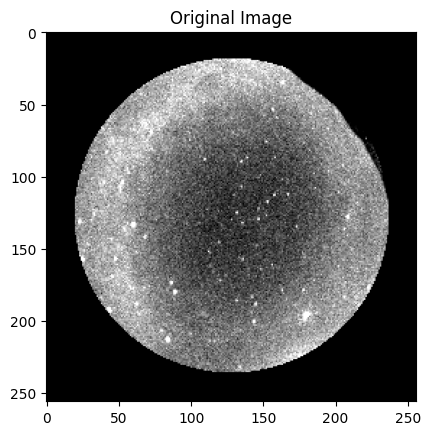

Contrast: [[348.27257966 394.12038447 357.51681985 384.36991926]]
Dissimilarity: [[10.6223652  11.00684352 10.70704657 10.99232603]]
Homogeneity: [[0.46488124 0.46100134 0.46436608 0.46057501]]
Energy: [[0.43213255 0.42849113 0.43214882 0.42858254]]
Correlation: [[0.91088332 0.89917349 0.90851788 0.90166792]]


In [19]:
from skimage.feature import graycomatrix, graycoprops

image_path = 'oath_v1.1/images/cropped_scaled/00209.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Define the distances and angles for GLCM computation
distances = [1]  # Distance between pixel pairs
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, and 135 degrees

# Compute GLCM
glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Extract texture properties from GLCM
contrast = graycoprops(glcm, prop='contrast')
dissimilarity = graycoprops(glcm, prop='dissimilarity')
homogeneity = graycoprops(glcm, prop='homogeneity')
energy = graycoprops(glcm, prop='energy')
correlation = graycoprops(glcm, prop='correlation')

print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")

# Visualize the GLCM for a specific angle (e.g., 0 degrees)
glcm_0_deg = glcm[:, :, 0, 0]  # Extract GLCM at distance=1, angle=0 degrees

# # Plot the GLCM
# plt.imshow(glcm_0_deg, cmap='gray')
# plt.title('GLCM (0 degrees)')
# plt.colorbar()
# plt.show()

### Feature Extraction on specific angles and properties 

In [20]:
from skimage.feature import graycomatrix, graycoprops

rough_df = pd.DataFrame(df)

# Image folder path
image_folder = 'oath_v1.1/images/cropped_scaled'

# Define angles and distance for GLCM computation
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, 135 degrees
distances = [1]

# Initialize lists to store features
contrast_list = {angle: [] for angle in angles}
dissimilarity_list = {angle: [] for angle in angles}
homogeneity_list = {angle: [] for angle in angles}
energy_list = {angle: [] for angle in angles}
correlation_list = {angle: [] for angle in angles}

# Loop through each row in the dataframe
for index, row in rough_df.iterrows():
    pic_num = str(row['picNum']).zfill(5)  # Format picNum as 5 digits
    image_path = f"{image_folder}/{pic_num}.png"
    
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None:
        # Compute GLCM for each angle
        for angle in angles:
            glcm = graycomatrix(img, distances=distances, angles=[angle], levels=256, symmetric=True, normed=True)
            
            # Compute texture properties
            contrast = graycoprops(glcm, prop='contrast')[0, 0]
            dissimilarity = graycoprops(glcm, prop='dissimilarity')[0, 0]
            homogeneity = graycoprops(glcm, prop='homogeneity')[0, 0]
            energy = graycoprops(glcm, prop='energy')[0, 0]
            correlation = graycoprops(glcm, prop='correlation')[0, 0]
            
            # Append the features to the lists
            contrast_list[angle].append(contrast)
            dissimilarity_list[angle].append(dissimilarity)
            homogeneity_list[angle].append(homogeneity)
            energy_list[angle].append(energy)
            correlation_list[angle].append(correlation)
    else:
        # In case of missing image, append NaNs
        for angle in angles:
            contrast_list[angle].append(np.nan)
            dissimilarity_list[angle].append(np.nan)
            homogeneity_list[angle].append(np.nan)
            energy_list[angle].append(np.nan)
            correlation_list[angle].append(np.nan)

# Add the computed features to the dataframe
for angle in angles:
    angle_degree = int(np.degrees(angle))  # Convert radian to degrees
    rough_df[f'contrast_{angle_degree}'] = contrast_list[angle]
    rough_df[f'dissimilarity_{angle_degree}'] = dissimilarity_list[angle]
    rough_df[f'homogeneity_{angle_degree}'] = homogeneity_list[angle]
    rough_df[f'energy_{angle_degree}'] = energy_list[angle]
    rough_df[f'correlation_{angle_degree}'] = correlation_list[angle]

# Display the updated dataframe
rough_df.head()

,class2,class6,picNum,picType,rotAng,contrast_0,dissimilarity_0,homogeneity_0,energy_0,correlation_0,...,contrast_90,dissimilarity_90,homogeneity_90,energy_90,correlation_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135
0,0,2,1,discrete,334,43.405852,3.601501,0.519098,0.428466,0.978027,...,48.288419,3.732384,0.518075,0.428919,0.975555,48.537209,3.814225,0.513478,0.425342,0.975472
1,0,2,2,discrete,29,34.022089,3.196507,0.528815,0.428848,0.979796,...,38.065227,3.317065,0.526193,0.429257,0.977395,38.434971,3.389589,0.522983,0.425451,0.977214
2,0,2,3,discrete,355,44.389308,3.668995,0.516410,0.428787,0.979306,...,49.897365,3.816667,0.515446,0.428892,0.976738,49.900715,3.907974,0.510486,0.425283,0.976774
3,0,0,4,arc,118,66.010263,4.474540,0.502151,0.428497,0.971727,...,73.038113,4.662071,0.500264,0.428677,0.968717,71.349696,4.724245,0.496645,0.425100,0.969487
4,0,0,5,arc,55,68.051225,4.533456,0.500521,0.428158,0.970949,...,75.299877,4.750429,0.498114,0.428658,0.967855,74.329166,4.799539,0.495641,0.424930,0.968317


In [44]:
#  DEFINNG TEST DATA
from skimage.feature import graycomatrix, graycoprops

# Image folder path for test data
test_image_folder = '/Users/nishchayaroy/Desktop/ML_final_sub/final_notebooks/Dataset2/arc_png'

# Define angles and distances for GLCM computation
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, 135 degrees
distances = [1]

# Initialize lists to store features
contrast_list = {angle: [] for angle in angles}
dissimilarity_list = {angle: [] for angle in angles}
homogeneity_list = {angle: [] for angle in angles}
energy_list = {angle: [] for angle in angles}
correlation_list = {angle: [] for angle in angles}

# List all PNG files in the test image folder
test_images = [f for f in os.listdir(test_image_folder) if f.endswith('.png')]

# Initialize a dataframe to store results
test_df = pd.DataFrame({'image_name': test_images})

# Process each test image
for image_name in test_images:
    image_path = os.path.join(test_image_folder, image_name)
    
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None:
        # Compute GLCM for each angle
        for angle in angles:
            glcm = graycomatrix(img, distances=distances, angles=[angle], levels=256, symmetric=True, normed=True)
            
            # Compute texture properties
            contrast = graycoprops(glcm, prop='contrast')[0, 0]
            dissimilarity = graycoprops(glcm, prop='dissimilarity')[0, 0]
            homogeneity = graycoprops(glcm, prop='homogeneity')[0, 0]
            energy = graycoprops(glcm, prop='energy')[0, 0]
            correlation = graycoprops(glcm, prop='correlation')[0, 0]
            
            # Append the features to the lists
            contrast_list[angle].append(contrast)
            dissimilarity_list[angle].append(dissimilarity)
            homogeneity_list[angle].append(homogeneity)
            energy_list[angle].append(energy)
            correlation_list[angle].append(correlation)
    else:
        # In case of missing or unreadable image, append NaNs
        for angle in angles:
            contrast_list[angle].append(np.nan)
            dissimilarity_list[angle].append(np.nan)
            homogeneity_list[angle].append(np.nan)
            energy_list[angle].append(np.nan)
            correlation_list[angle].append(np.nan)

# Add the computed features to the test dataframe
for angle in angles:
    angle_degree = int(np.degrees(angle))  # Convert radian to degrees
    test_df[f'contrast_{angle_degree}'] = contrast_list[angle]
    test_df[f'dissimilarity_{angle_degree}'] = dissimilarity_list[angle]
    test_df[f'homogeneity_{angle_degree}'] = homogeneity_list[angle]
    test_df[f'energy_{angle_degree}'] = energy_list[angle]
    test_df[f'correlation_{angle_degree}'] = correlation_list[angle]

# Display the updated test dataframe
# test_df['class2'] = 0
# test_df['rotAng'] = 0
test_df = test_df.drop(columns=['image_name'])
# print(test_df.head())


In [45]:
test_df.head()

,contrast_0,dissimilarity_0,homogeneity_0,energy_0,correlation_0,contrast_45,dissimilarity_45,homogeneity_45,energy_45,correlation_45,contrast_90,dissimilarity_90,homogeneity_90,energy_90,correlation_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135
0,51.756647,1.392224,0.675546,0.203032,0.976186,90.015639,2.230374,0.574519,0.199116,0.958582,51.779551,1.568617,0.633578,0.201894,0.976180,61.886094,1.729962,0.605966,0.199588,0.971525
1,23.175238,1.192737,0.686265,0.208020,0.990280,38.684471,1.757629,0.609697,0.203399,0.983776,25.270537,1.344818,0.676409,0.207859,0.989401,31.954369,1.588649,0.627848,0.203863,0.986598
2,48.930860,1.539962,0.646494,0.200949,0.992003,69.083131,2.470857,0.554596,0.197706,0.988716,36.774907,1.756870,0.615834,0.200166,0.993990,64.308612,1.943099,0.587046,0.198337,0.989496
3,26.558734,1.540324,0.653970,0.204932,0.995338,50.181101,2.442837,0.574488,0.200508,0.991198,21.900088,1.599601,0.644463,0.204711,0.996156,27.694667,1.602763,0.613847,0.201518,0.995142
4,35.172189,1.872613,0.615105,0.201147,0.995155,65.924373,3.214206,0.529217,0.197660,0.990922,29.791163,2.080115,0.595647,0.200923,0.995896,40.324505,1.916921,0.577929,0.198771,0.994447


In [46]:
df.head()

,class2,class6,picNum,picType,rotAng,contrast_0,dissimilarity_0,homogeneity_0,energy_0,correlation_0,...,contrast_90,dissimilarity_90,homogeneity_90,energy_90,correlation_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135
0,0,2,1,discrete,334,43.405852,3.601501,0.519098,0.428466,0.978027,...,48.288419,3.732384,0.518075,0.428919,0.975555,48.537209,3.814225,0.513478,0.425342,0.975472
1,0,2,2,discrete,29,34.022089,3.196507,0.528815,0.428848,0.979796,...,38.065227,3.317065,0.526193,0.429257,0.977395,38.434971,3.389589,0.522983,0.425451,0.977214
2,0,2,3,discrete,355,44.389308,3.668995,0.516410,0.428787,0.979306,...,49.897365,3.816667,0.515446,0.428892,0.976738,49.900715,3.907974,0.510486,0.425283,0.976774
3,0,0,4,arc,118,66.010263,4.474540,0.502151,0.428497,0.971727,...,73.038113,4.662071,0.500264,0.428677,0.968717,71.349696,4.724245,0.496645,0.425100,0.969487
4,0,0,5,arc,55,68.051225,4.533456,0.500521,0.428158,0.970949,...,75.299877,4.750429,0.498114,0.428658,0.967855,74.329166,4.799539,0.495641,0.424930,0.968317


In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named df and is already loaded
# df contains the numerical features and class6 is the target

# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 82.55%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.56      0.62       185
           1       0.79      0.78      0.78       284
           2       0.76      0.80      0.78       363
           3       0.92      0.92      0.92       196
           4       0.94      0.96      0.95       164
           5       0.88      0.94      0.91       264

    accuracy                           0.83      1456
   macro avg       0.83      0.83      0.83      1456
weighted avg       0.82      0.83      0.82      1456



In [48]:
test_y = rf_model.predict(X = test_df)
print(test_y)

[2 2 0 ... 3 2 3]


In [49]:
count_zero = np.sum(test_y == 0)

# Calculate the total number of predictions
total_predictions = len(test_y)

# Calculate the percentage of 0 values in test_y
percentage_zero = (count_zero / total_predictions) * 100

# Print the result
print(f"Percentage of 0 values in test_y: {percentage_zero:.2f}%")

Percentage of 0 values in test_y: 12.86%


#### HyperParameter Tuning

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Assuming your dataframe is named df and is already loaded
# df contains the numerical features and class6 is the target

# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to sample from
param_distributions = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': randint(10, 50),       # Maximum depth of the tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]          # Whether to use bootstrap samples
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Number of different combinations to try
                                   cv=3,        # 3-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)   # Use all available processors

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print(f"Best parameters: {random_search.best_params_}")

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after hyperparameter tuning: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=33, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=251; total time=   2.8s
[CV] END bootstrap=True, max_depth=33, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=251; total time=   2.8s
[CV] END bootstrap=True, max_depth=48, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=430; total time=   5.3s
[CV] END bootstrap=True, max_depth=48, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=430; total time=   5.8s
[CV] END bootstrap=True, max_depth=48, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=430; total time=   5.9s
[CV] END bootstrap=True, max_depth=33, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=251; total time=   3.3s
[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=393; tota

#### Naive Bayes Model

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df and is already loaded
# df contains the numerical features and class6 is the target

# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 49.66%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.40      0.59      0.47       284
           2       0.43      0.67      0.53       363
           3       0.00      0.00      0.00       196
           4       0.68      0.95      0.79       164
           5       0.66      0.59      0.62       264

    accuracy                           0.50      1456
   macro avg       0.36      0.47      0.40      1456
weighted avg       0.38      0.50      0.43      1456



In [54]:
test_y = nb_model.predict(X = test_df)
print(test_y)
count_zero = np.sum(test_y == 0)


# Calculate the total number of predictions
total_predictions = len(test_y)


# Calculate the percentage of 0 values in test_y
percentage_zero = (count_zero / total_predictions) * 100


# Print the result
print(f"Percentage of 0 values in test_y: {percentage_zero:.2f}%")

[4 4 4 ... 4 4 4]
Percentage of 0 values in test_y: 0.03%


#### Cross Validation with Random Forest

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df and is already loaded
# df contains the numerical features and class6 is the target

# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=10)  # 5-fold cross-validation

# Print the cross-validation scores and mean accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")
rf_model.fit(X_train, y_train)

Cross-validation scores: [0.60205832 0.58662093 0.51629503 0.50943396 0.65979381 0.66494845
 0.5257732  0.51030928 0.55841924 0.54295533]
Mean cross-validation accuracy: 56.77%


RandomForestClassifier(random_state=42)

In [62]:
# pass
test_y = rf_model.predict(X = test_df)
print(test_y)
count_zero = np.sum(test_y == 0)


# Calculate the total number of predictions
total_predictions = len(test_y)


# Calculate the percentage of 0 values in test_y
percentage_zero = (count_zero / total_predictions) * 100


# Print the result
print(f"Accuracy on test data(no noise training), Random forest with 5 fold CV: {percentage_zero:.2f}%")

[2 2 0 ... 3 2 3]
Percentage of 0 values in test_y: 12.86%


#### Stratified CV

#### On 5 Folds

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df
# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

# Print the results
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%")

Cross-validated accuracy scores: [0.74576271 0.79661017 0.74576271 0.72881356 0.81355932 0.81355932
 0.81355932 0.76271186 0.86440678 0.6779661  0.72881356 0.83050847
 0.77966102 0.83050847 0.84745763 0.72881356 0.86440678 0.86440678
 0.88135593 0.86440678 0.74576271 0.81355932 0.79661017 0.6779661
 0.74137931 0.74137931 0.79310345 0.72413793 0.72413793 0.9137931
 0.75862069 0.72413793 0.77586207 0.77586207 0.82758621 0.74137931
 0.79310345 0.75862069 0.79310345 0.77586207 0.82758621 0.82758621
 0.75862069 0.74137931 0.74137931 0.74137931 0.82758621 0.79310345
 0.79310345 0.72413793 0.74137931 0.82758621 0.82758621 0.86206897
 0.74137931 0.86206897 0.79310345 0.75862069 0.81034483 0.74137931
 0.74137931 0.79310345 0.75862069 0.84482759 0.84482759 0.79310345
 0.68965517 0.68965517 0.79310345 0.82758621 0.93103448 0.86206897
 0.72413793 0.82758621 0.74137931 0.75862069 0.75862069 0.82758621
 0.72413793 0.75862069 0.79310345 0.84482759 0.67241379 0.81034483
 0.74137931 0.84482759 0.758620

#### On 50 Folds

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df
# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class6', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

# Print the results
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%")
rf_model.fit(X_train, y_train)

Cross-validated accuracy scores: [0.76271186 0.84745763 0.79661017 0.79661017 0.86440678 0.83050847
 0.76271186 0.86440678 0.83050847 0.79661017 0.91525424 0.88135593
 0.88135593 0.81355932 0.91525424 0.83050847 0.88135593 0.86440678
 0.88135593 0.84745763 0.84745763 0.83050847 0.93220339 0.77966102
 0.89655172 0.77586207 0.9137931  0.86206897 0.87931034 0.94827586
 0.87931034 0.79310345 0.81034483 0.82758621 0.87931034 0.84482759
 0.82758621 0.77586207 0.84482759 0.87931034 0.89655172 0.81034483
 0.79310345 0.94827586 0.77586207 0.87931034 0.84482759 0.82758621
 0.89655172 0.79310345 0.89655172 0.86206897 0.77586207 0.84482759
 0.81034483 0.86206897 0.93103448 0.86206897 0.87931034 0.75862069
 0.84482759 0.82758621 0.84482759 0.82758621 0.86206897 0.82758621
 0.89655172 0.74137931 0.87931034 0.89655172 0.93103448 0.9137931
 0.84482759 0.87931034 0.82758621 0.77586207 0.87931034 0.89655172
 0.86206897 0.87931034 0.86206897 0.82758621 0.74137931 0.84482759
 0.86206897 0.9137931  0.87931

RandomForestClassifier(n_estimators=10, random_state=42)

In [69]:
test_y = rf_model.predict(X = test_df)
print(test_y)
count_zero = np.sum(test_y == 0)


# Calculate the total number of predictions
total_predictions = len(test_y)


# Calculate the percentage of 0 values in test_y
percentage_zero = (count_zero / total_predictions) * 100


# Print the result
print(f"Accuracy on test data(no noise training), Random forest with 50 fold CV: {percentage_zero:.2f}%")

[0 0 1 ... 3 0 3]
Accuracy on test data(no noise training), Random forest with 50 fold CV: 51.19%


#### On 100 Folds


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df
# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])
y = rough_df['class6']  # Target variable

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

# Print the results
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%")
rf_model.fit(X_train, y_train)

Cross-validated accuracy scores: [0.83050847 0.88135593 0.84745763 0.89830508 0.86440678 0.84745763
 0.81355932 0.86440678 0.91525424 0.83050847 0.94915254 0.86440678
 0.89830508 0.91525424 0.89830508 0.89830508 0.88135593 0.91525424
 0.89830508 0.89830508 0.84745763 0.86440678 0.91525424 0.77966102
 0.9137931  0.82758621 0.89655172 0.84482759 0.82758621 0.9137931
 0.9137931  0.82758621 0.84482759 0.89655172 0.9137931  0.81034483
 0.87931034 0.84482759 0.86206897 0.87931034 0.89655172 0.86206897
 0.89655172 0.93103448 0.82758621 0.87931034 0.87931034 0.84482759
 0.93103448 0.79310345 0.84482759 0.89655172 0.81034483 0.9137931
 0.9137931  0.86206897 0.9137931  0.86206897 0.9137931  0.79310345
 0.82758621 0.93103448 0.87931034 0.9137931  0.86206897 0.84482759
 0.87931034 0.84482759 0.89655172 0.9137931  0.9137931  0.84482759
 0.84482759 0.94827586 0.89655172 0.82758621 0.89655172 0.9137931
 0.93103448 0.89655172 0.84482759 0.87931034 0.77586207 0.86206897
 0.9137931  0.87931034 0.8793103

RandomForestClassifier(random_state=42)

In [71]:
test_y = rf_model.predict(X = test_df)
print(test_y)
count_zero = np.sum(test_y == 0)


# Calculate the total number of predictions
total_predictions = len(test_y)


# Calculate the percentage of 0 values in test_y
percentage_zero = (count_zero / total_predictions) * 100


# Print the result
print(f"Accuracy on test data(no noise training), Random forest with 100 fold CV: {percentage_zero:.2f}%")

[2 2 0 ... 3 2 3]
Accuracy on test data(no noise training), Random forest with 100 fold CV: 12.86%


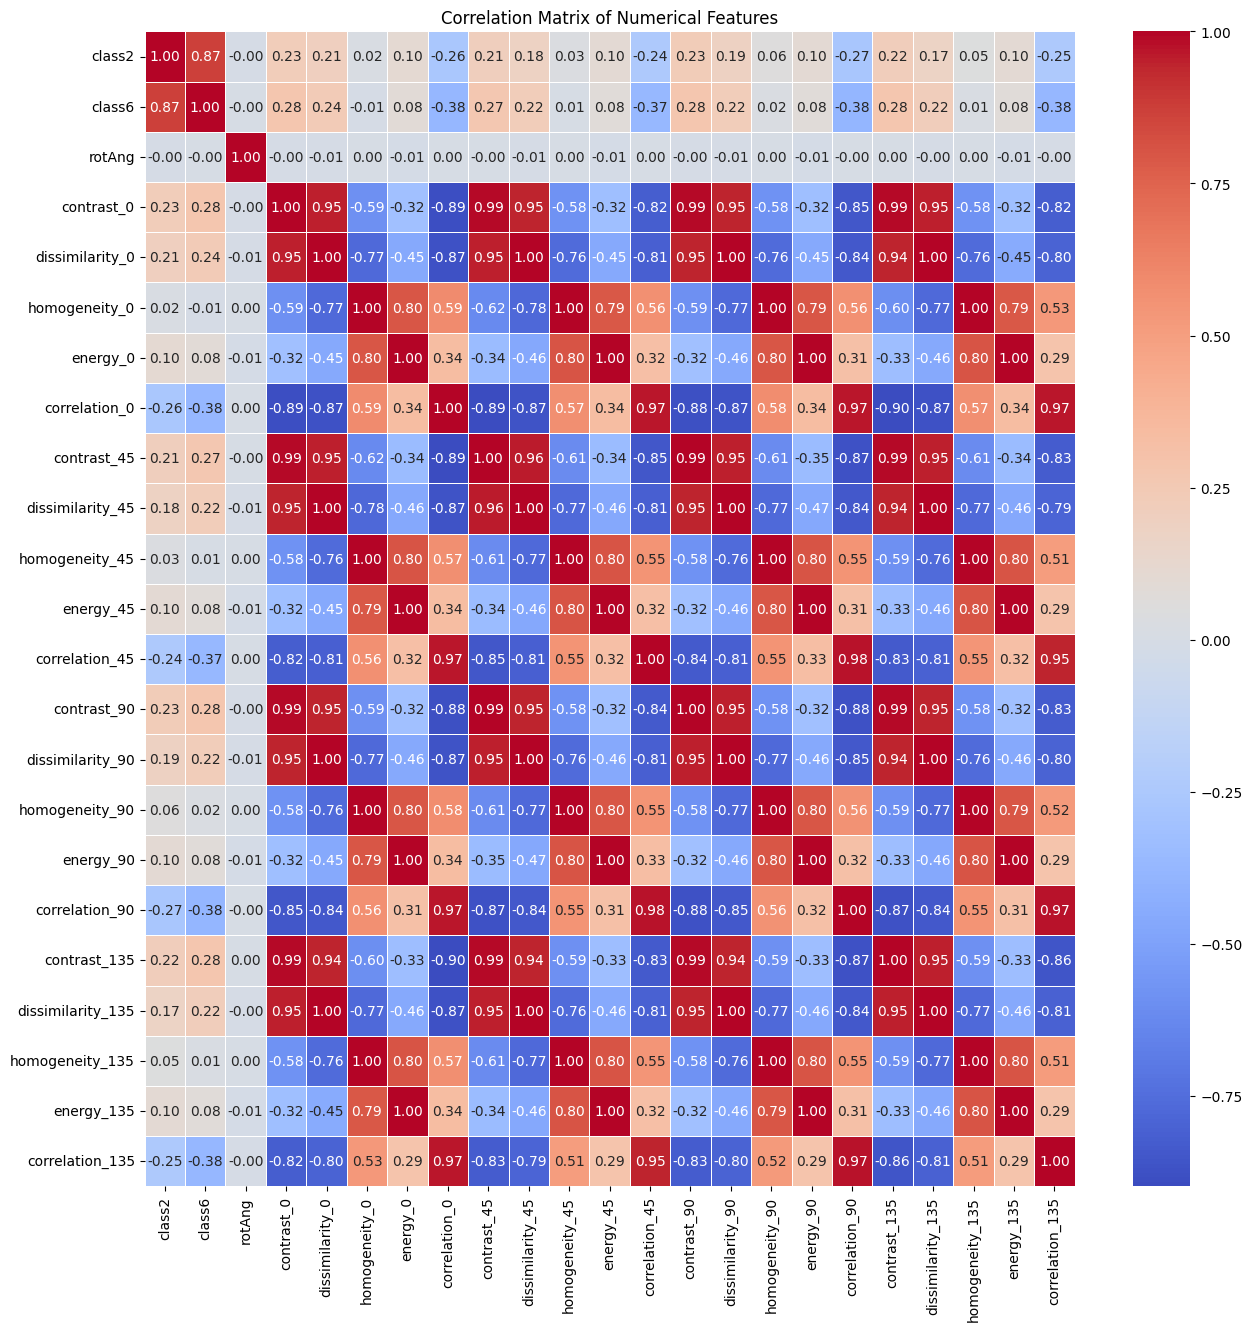

In [29]:
# Selecting features to include in the correlation matrix
features_to_include = rough_df.drop(columns=['picNum', 'picType'])

# Compute the correlation matrix
corr_matrix = features_to_include.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [30]:
rough_df.to_csv("output_file.csv",index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting GLCM histograms at 0°:


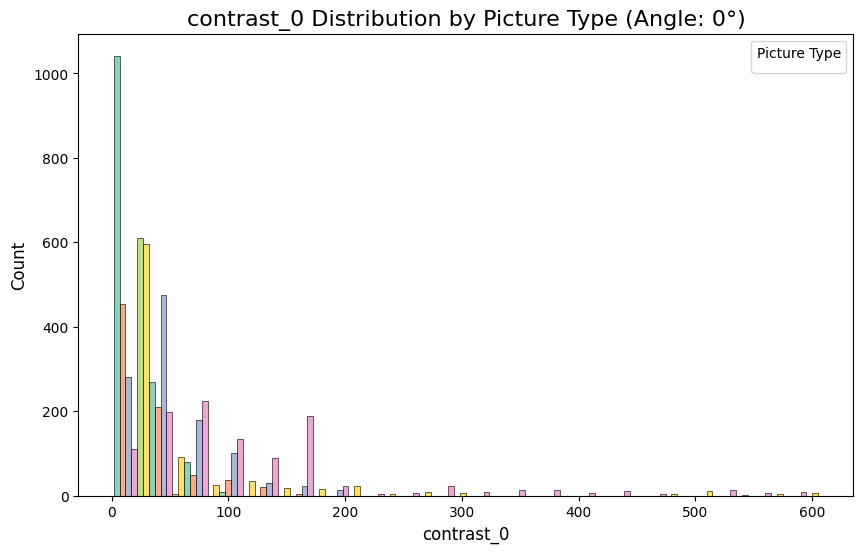

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


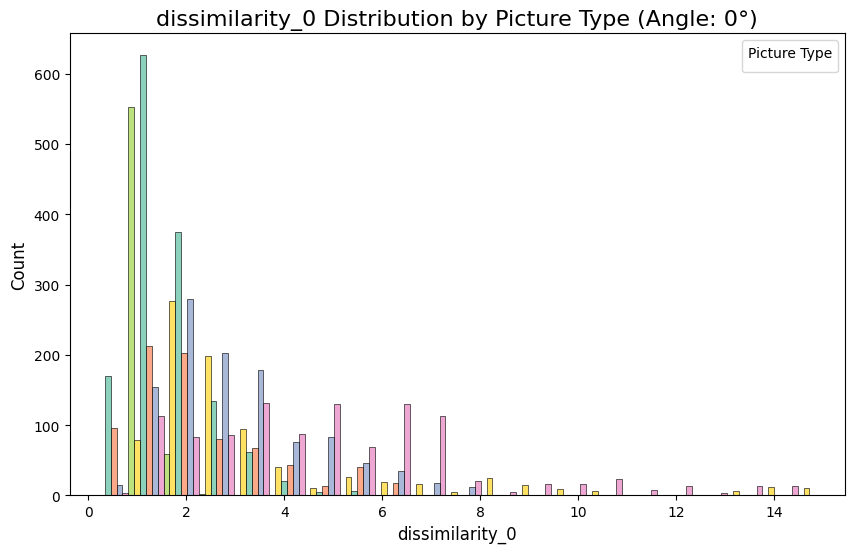

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


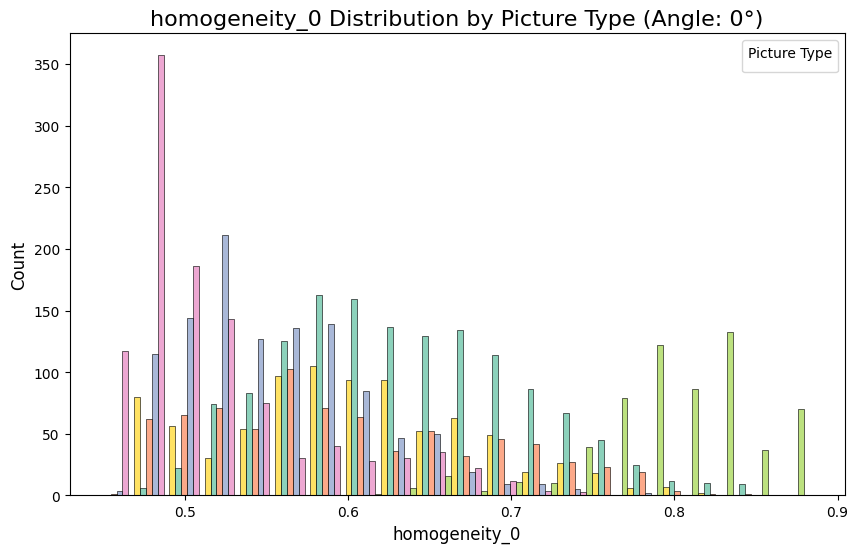

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


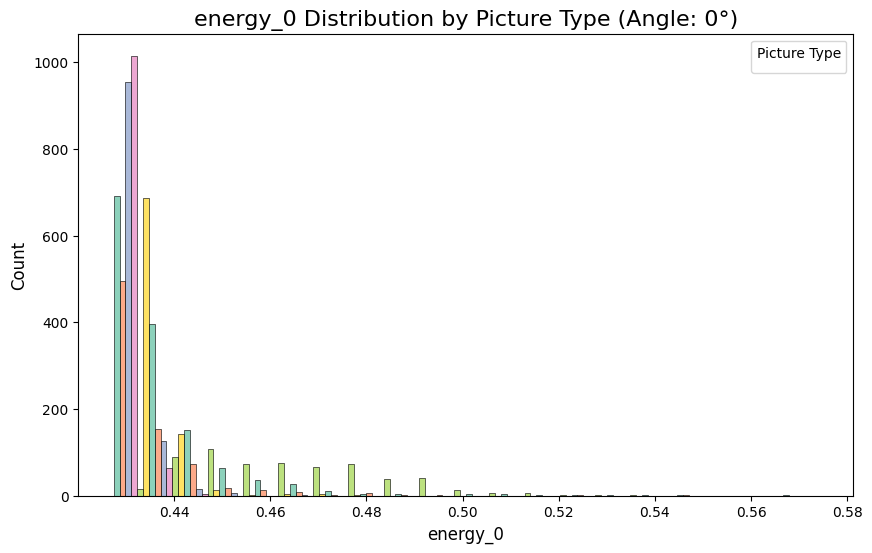

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


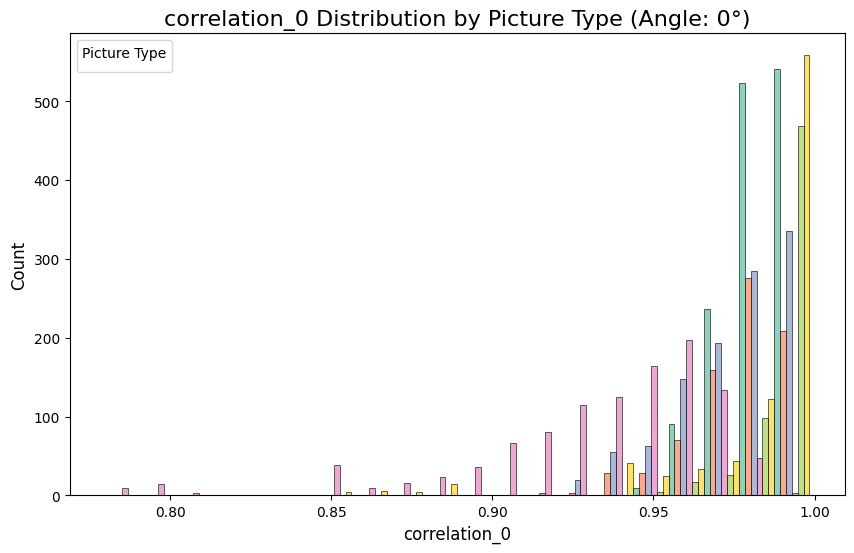

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting GLCM histograms at 45°:


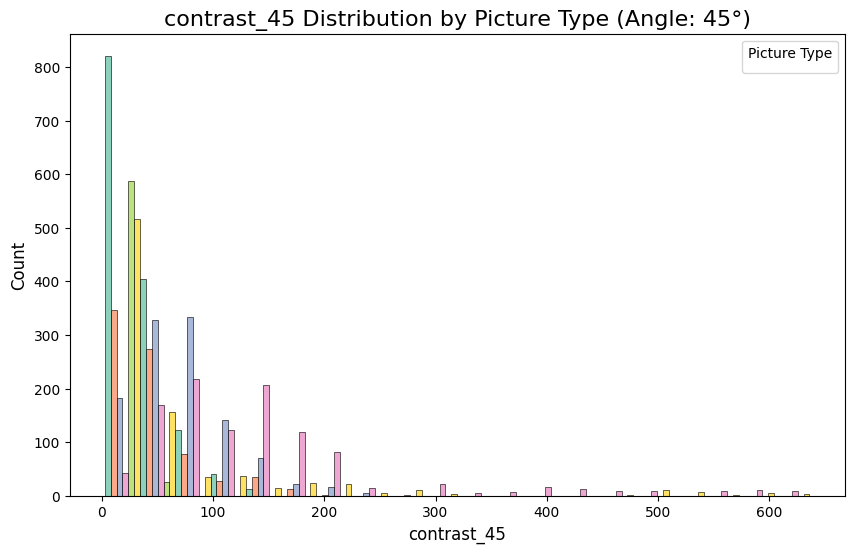

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


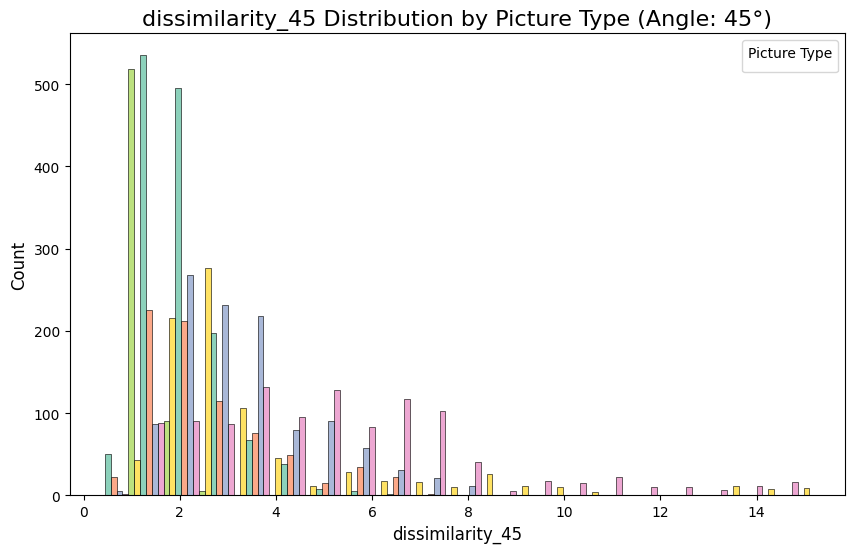

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


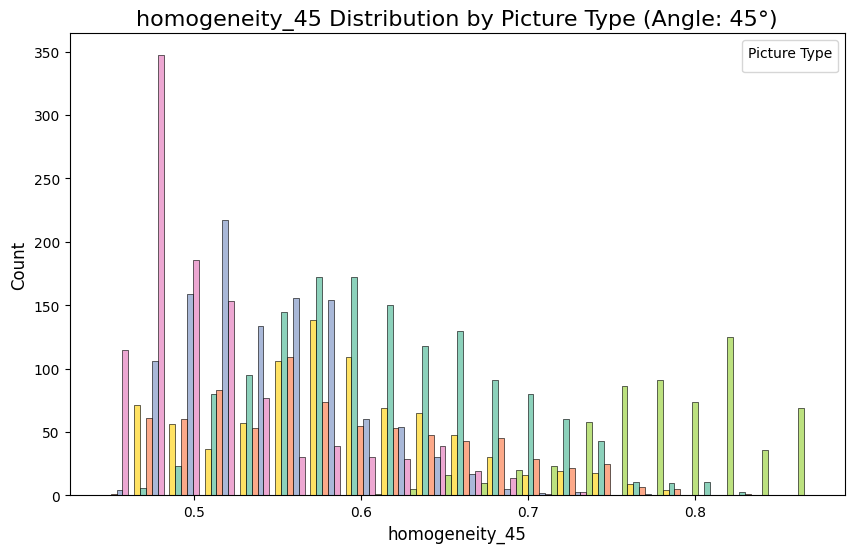

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


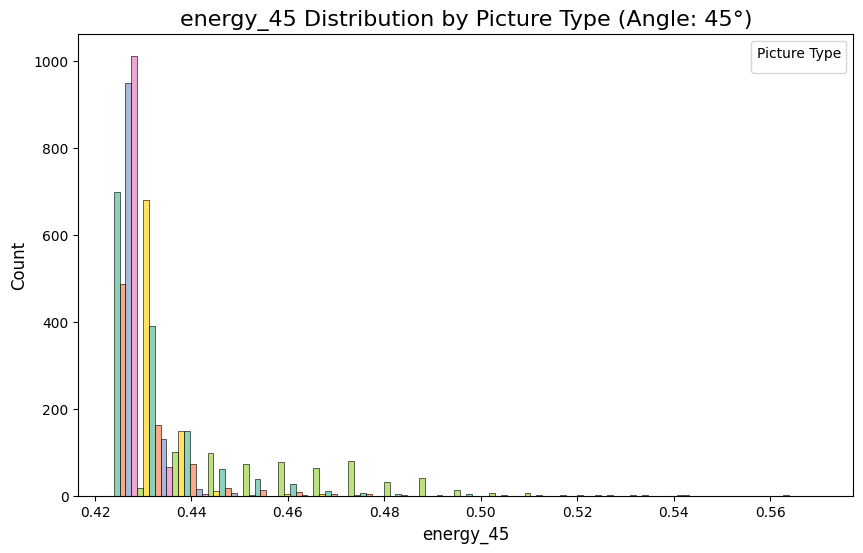

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


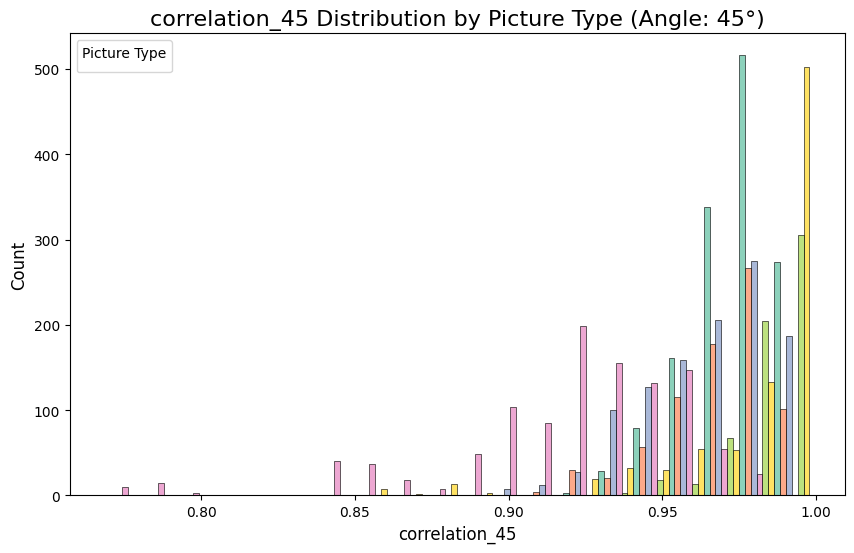

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting GLCM histograms at 90°:


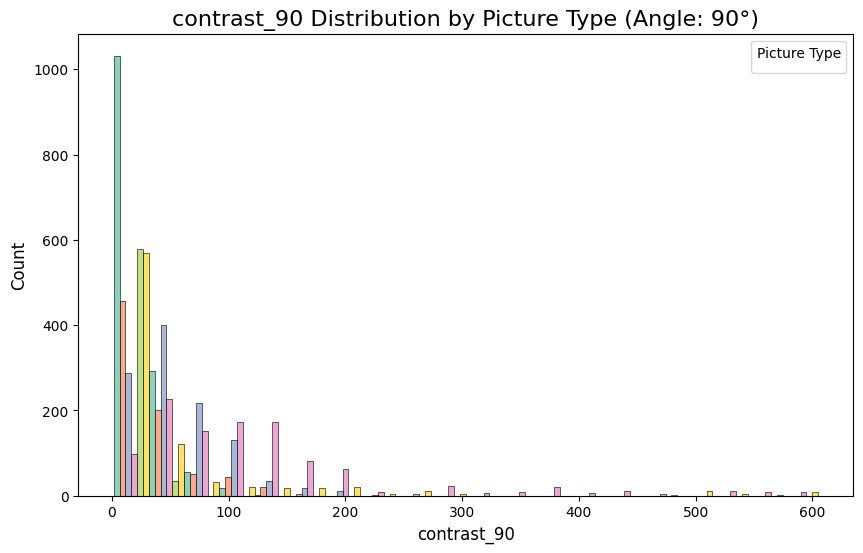

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


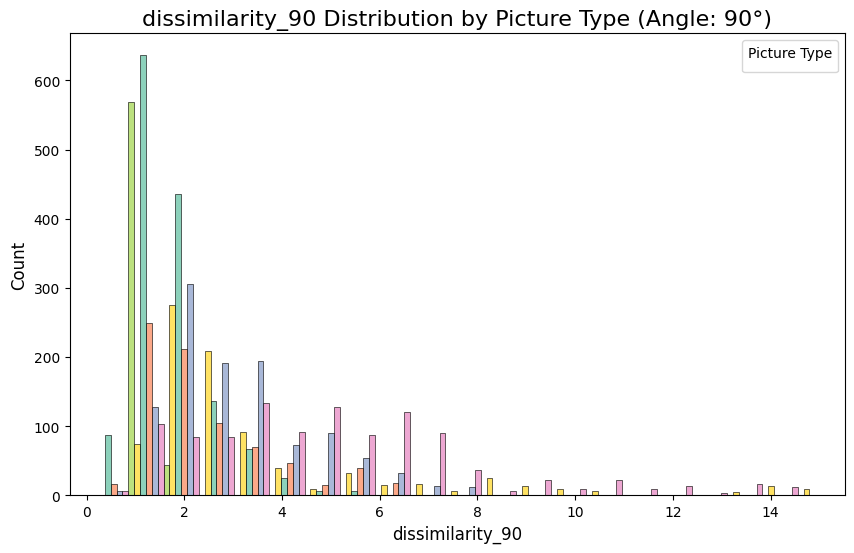

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


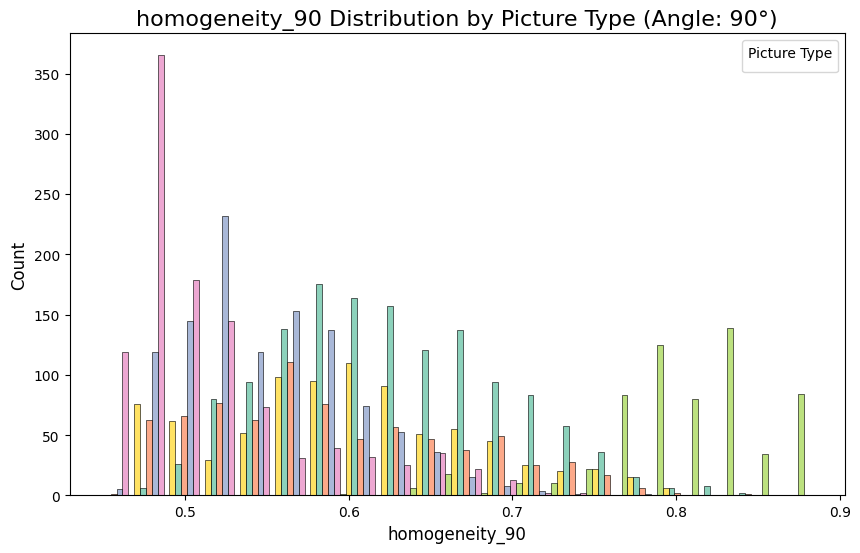

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


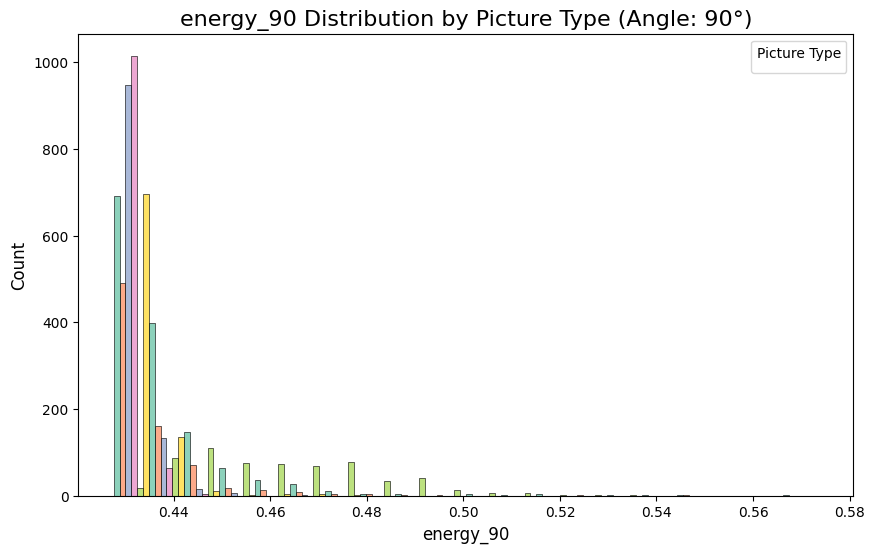

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


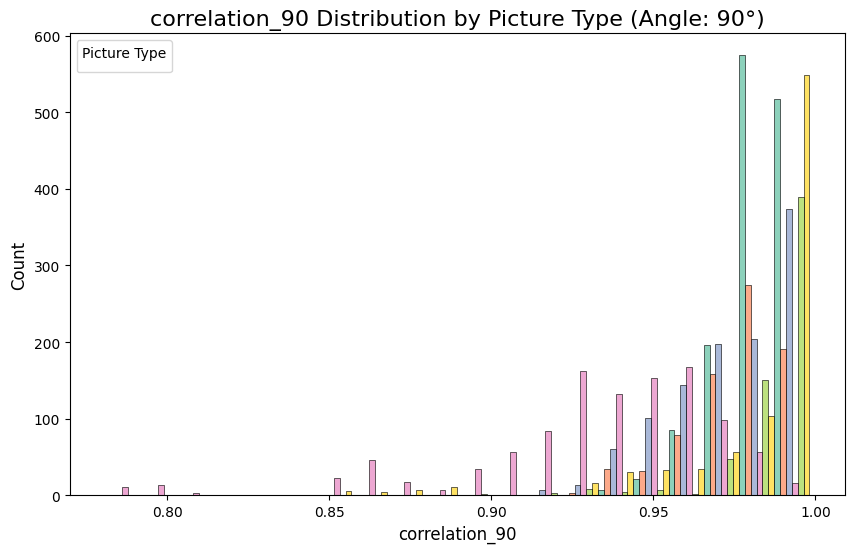

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting GLCM histograms at 135°:


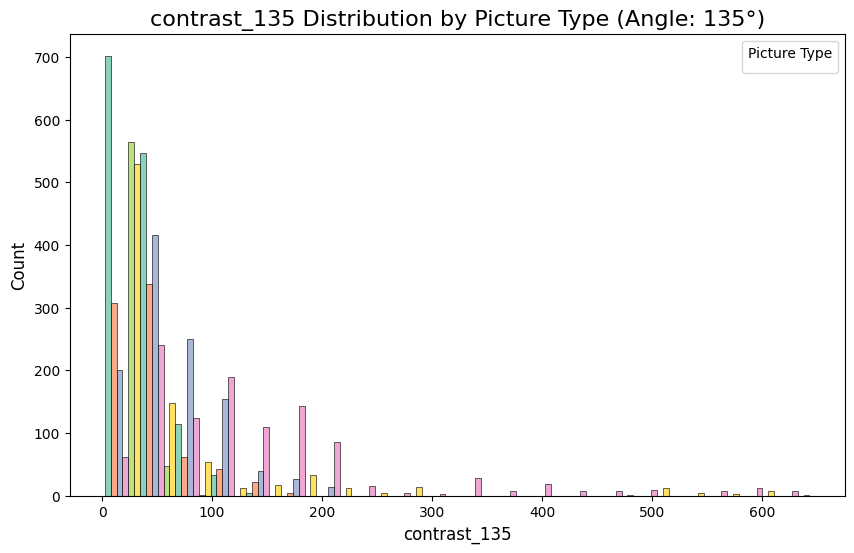

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


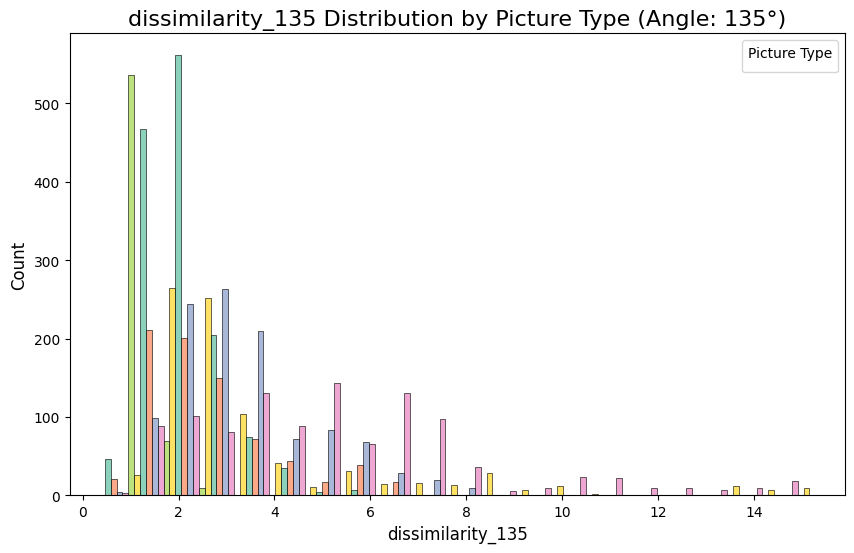

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


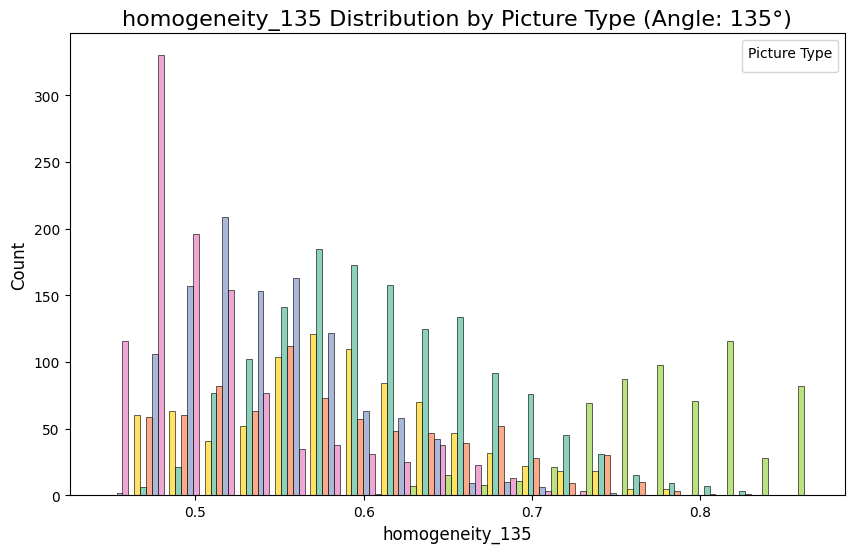

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


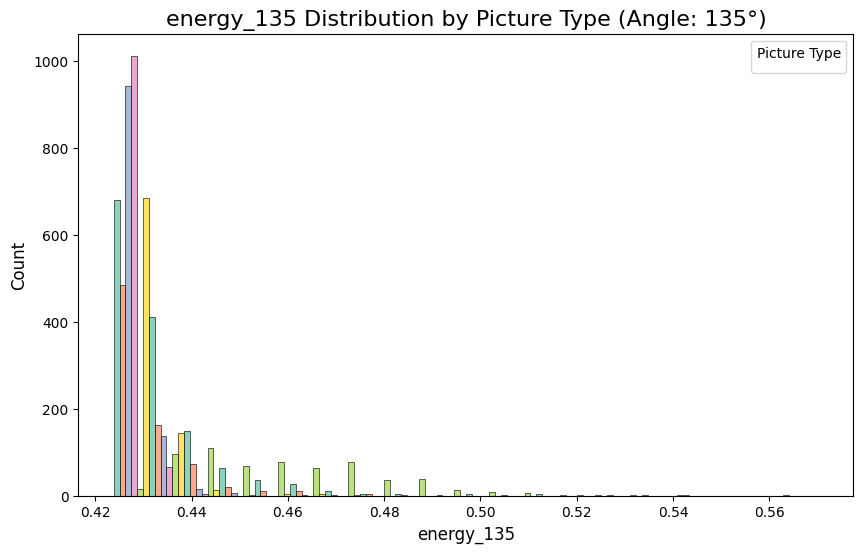

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


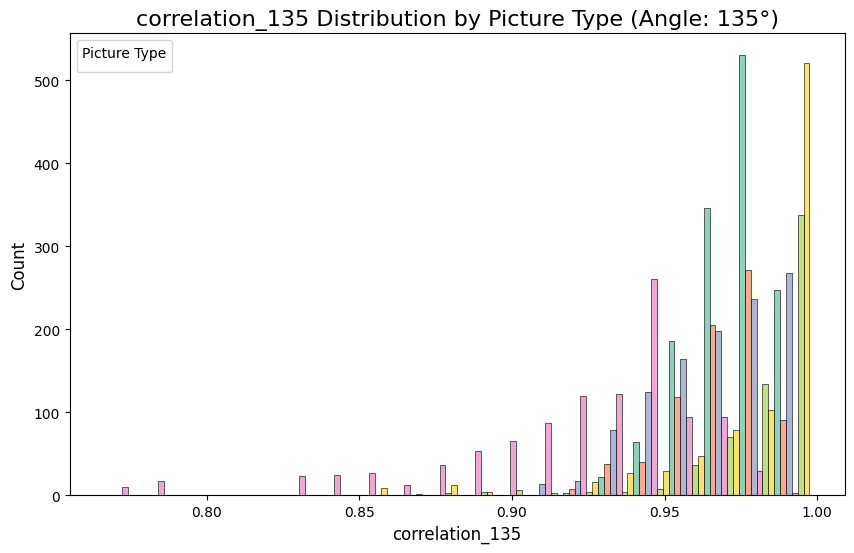

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'path_to_your_csv_file.csv'  # Replace with the actual path to your CSV file
# df = pd.read_csv(file_path)

# Define GLCM features grouped by angles (0°, 45°, 90°, 135°)
glcm_features_0 = ['contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0']
glcm_features_45 = ['contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45']
glcm_features_90 = ['contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90']
glcm_features_135 = ['contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135']

# Define color palette for picType
palette = sns.color_palette("Set2", df['picType'].nunique())  # Custom color palette for different picTypes

# Create a function to plot GLCM histograms by angle
def plot_glcm_histogram_by_angle(angle_features, angle):
    for feature in angle_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=rough_df, x=feature, hue='picType', palette=palette, multiple='dodge', kde=False, bins=20)
        plt.title(f'{feature} Distribution by Picture Type (Angle: {angle}°)', fontsize=16)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(title='Picture Type')  # You can set to False to hide the legend
        plt.show()

# Plot GLCM histograms for each angle (0°, 45°, 90°, 135°)
print("Plotting GLCM histograms at 0°:")
plot_glcm_histogram_by_angle(glcm_features_0, 0)

print("Plotting GLCM histograms at 45°:")
plot_glcm_histogram_by_angle(glcm_features_45, 45)

print("Plotting GLCM histograms at 90°:")
plot_glcm_histogram_by_angle(glcm_features_90, 90)

print("Plotting GLCM histograms at 135°:")
plot_glcm_histogram_by_angle(glcm_features_135, 135)

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


Plotting GLCM box plots at 0°:


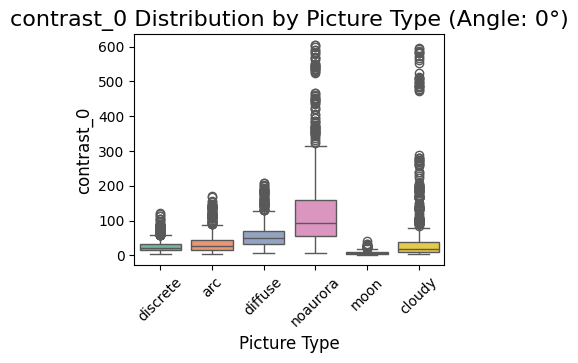

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


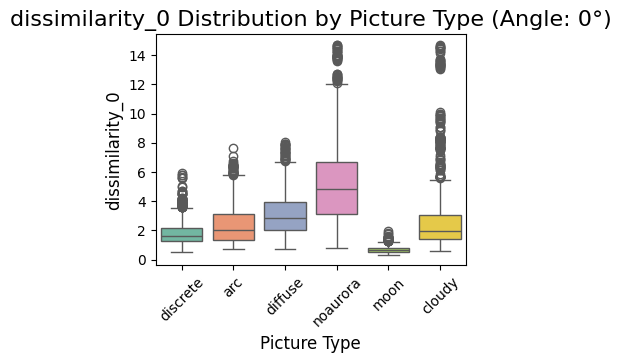

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


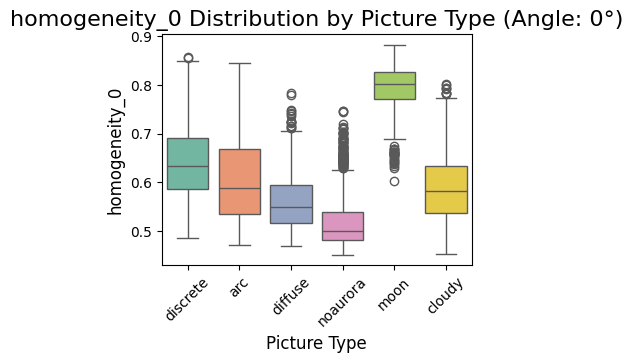

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


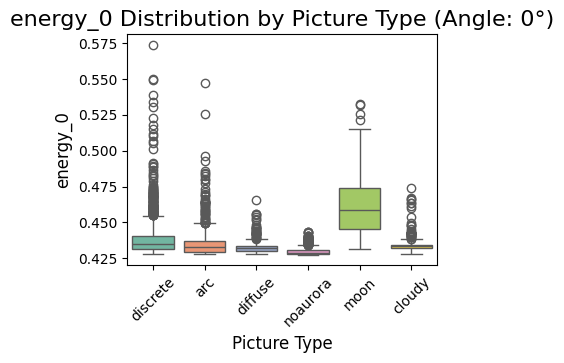

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


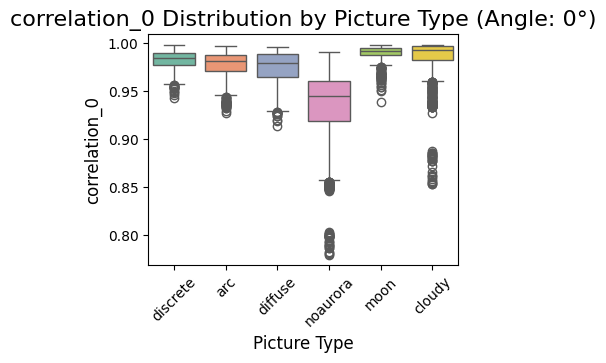

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


Plotting GLCM box plots at 45°:


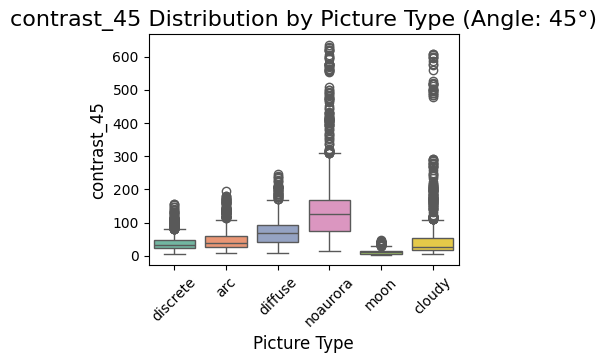

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


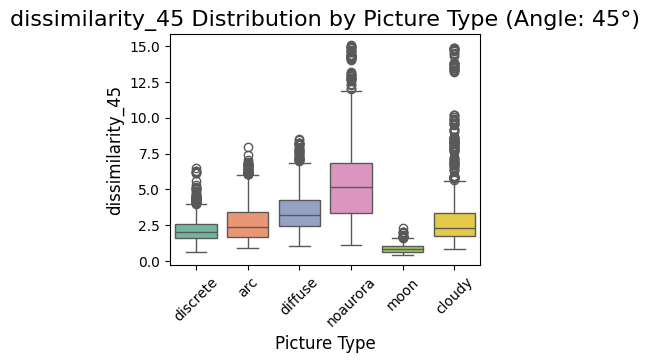

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


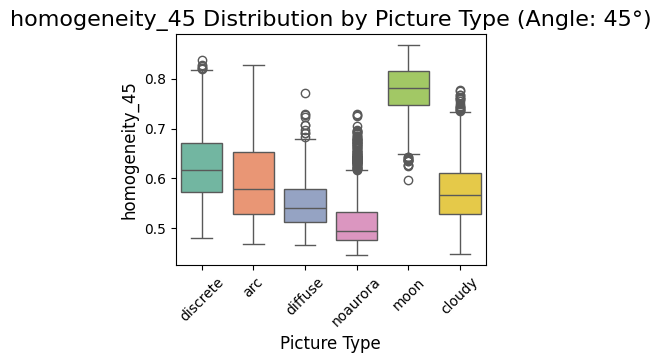

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


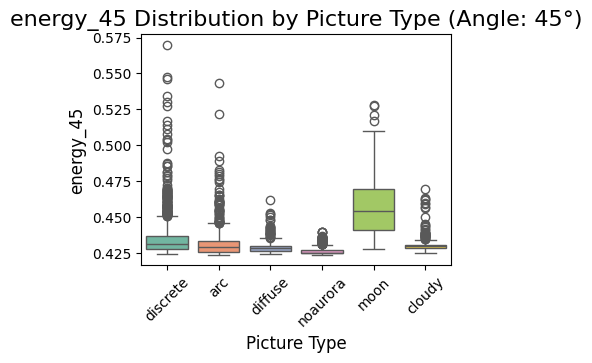

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


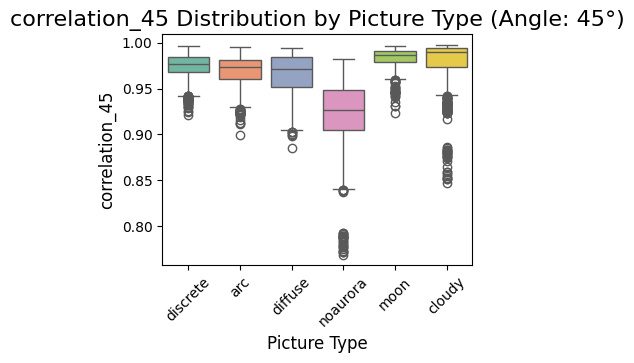

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


Plotting GLCM box plots at 90°:


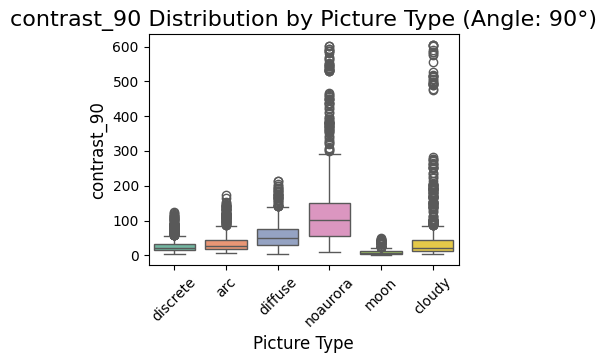

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


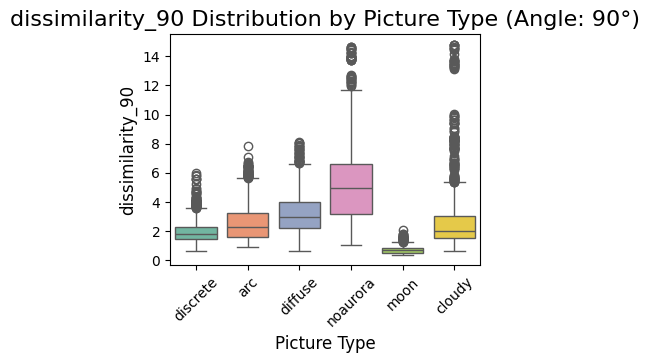

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


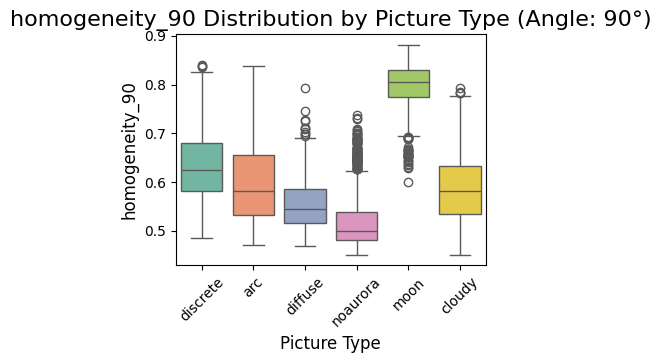

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


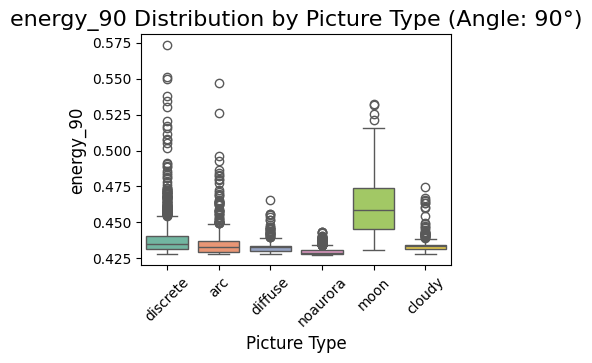

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


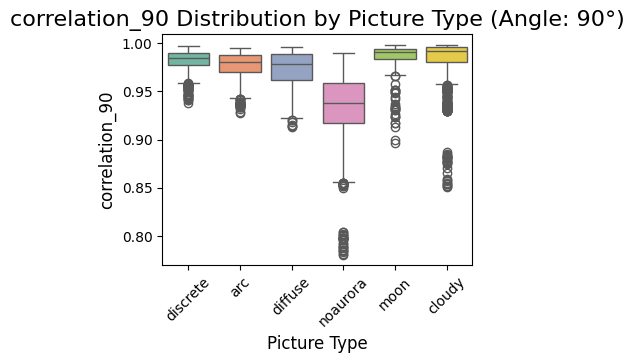

Plotting GLCM box plots at 135°:


/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


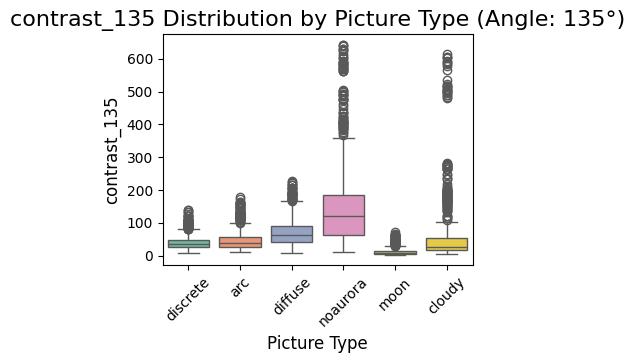

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


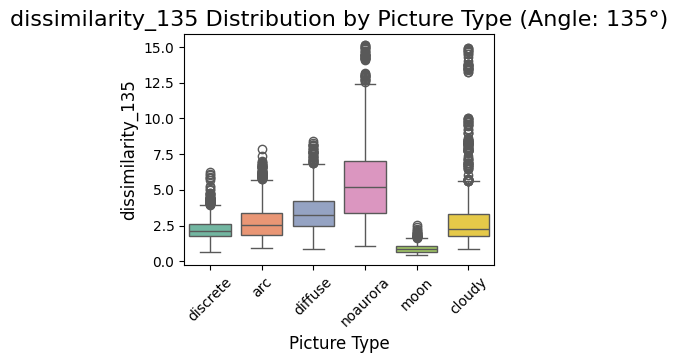

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


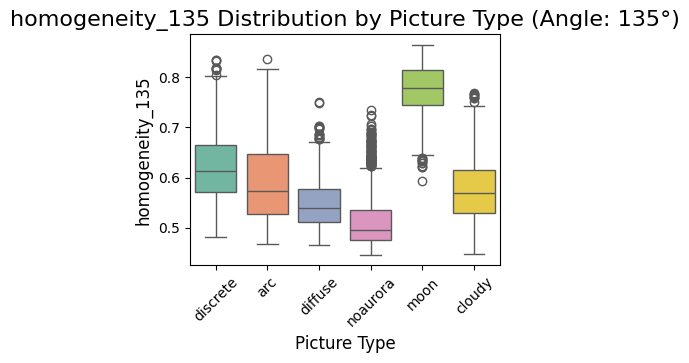

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


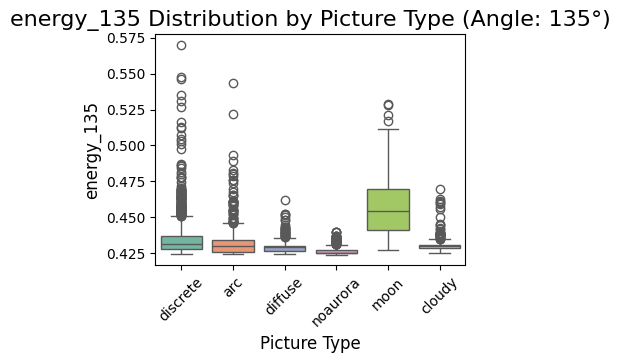

/var/folders/lz/b1dcx42s385gh0hs_504scqh0000gn/T/ipykernel_25778/27995986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')


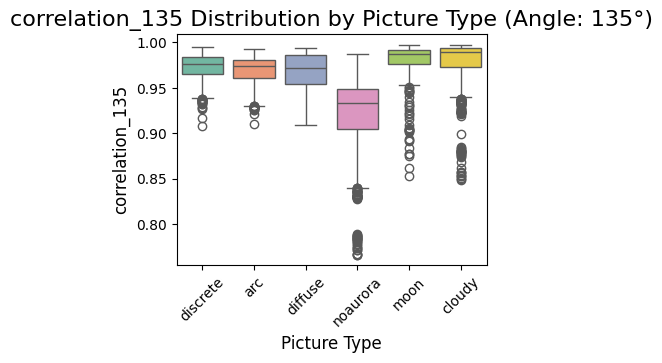

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'path_to_your_csv_file.csv'  # Replace with the actual path to your CSV file
# df = pd.read_csv(file_path)

# Define GLCM features grouped by angles (0°, 45°, 90°, 135°)
glcm_features_0 = ['contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0']
glcm_features_45 = ['contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45']
glcm_features_90 = ['contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90']
glcm_features_135 = ['contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135']

# Create a function to plot GLCM box plots by angle
def plot_glcm_boxplot_by_angle(angle_features, angle):
    for feature in angle_features:
        plt.figure(figsize=(4, 3))
        sns.boxplot(data=rough_df, x='picType', y=feature, palette='Set2')
        plt.title(f'{feature} Distribution by Picture Type (Angle: {angle}°)', fontsize=16)
        plt.xlabel('Picture Type', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.show()

# Plot GLCM box plots for each angle (0°, 45°, 90°, 135°)
print("Plotting GLCM box plots at 0°:")
plot_glcm_boxplot_by_angle(glcm_features_0, 0)

print("Plotting GLCM box plots at 45°:")
plot_glcm_boxplot_by_angle(glcm_features_45, 45)

print("Plotting GLCM box plots at 90°:")
plot_glcm_boxplot_by_angle(glcm_features_90, 90)

print("Plotting GLCM box plots at 135°:")
plot_glcm_boxplot_by_angle(glcm_features_135, 135)

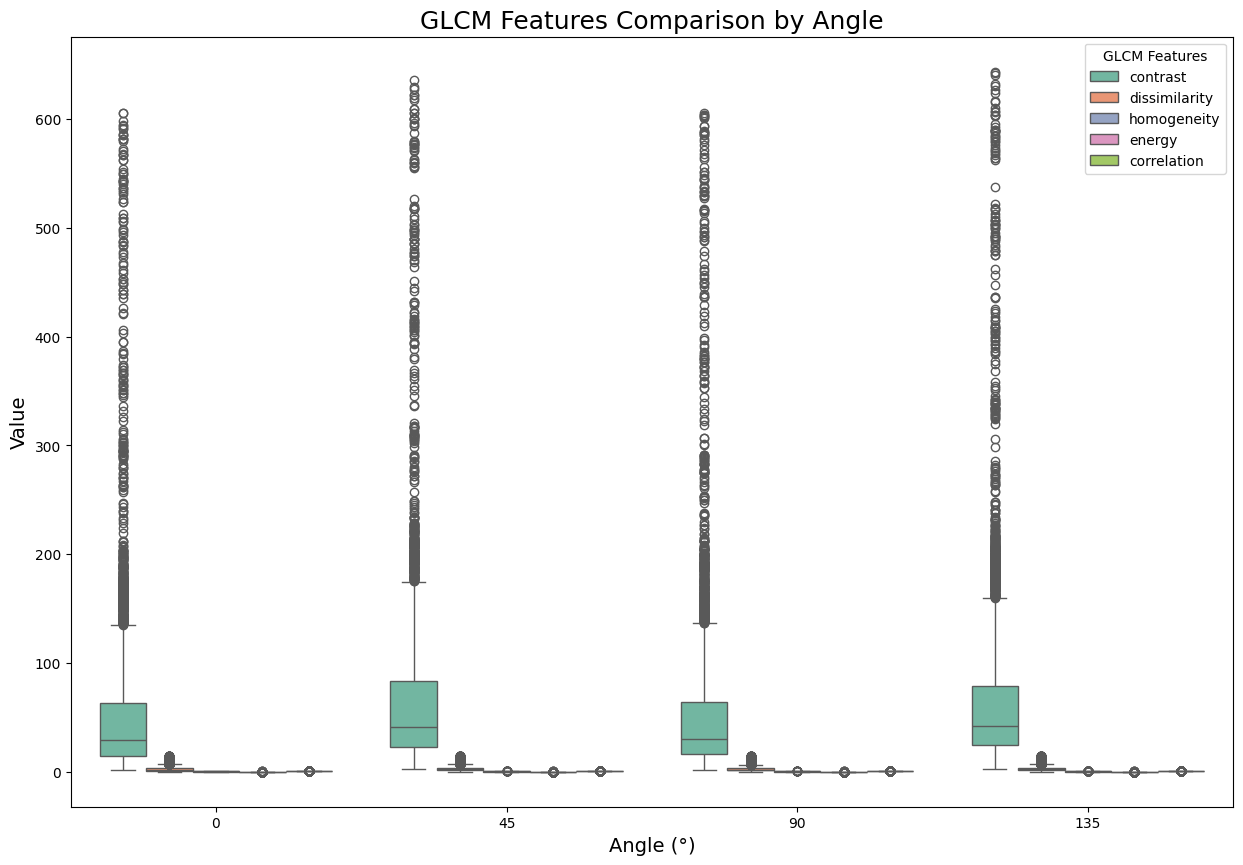

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = 'path_to_your_csv_file.csv'  # Replace with the actual path to your CSV file
# df = pd.read_csv(file_path)

# Define GLCM features grouped by angles (0°, 45°, 90°, 135°)
glcm_features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
angles = [0, 45, 90, 135]

# Create a function to plot GLCM features by angle
def plot_glcm_features_by_angle(features, angles):
    # Reshape the DataFrame for better plotting
    melted_df = pd.melt(rough_df, id_vars=['picType'], 
                        value_vars=[f'{feature}_{angle}' for feature in features for angle in angles],
                        var_name='GLCM_Feature', value_name='Value')
    
    # Extract angle information from the GLCM_Feature column
    melted_df['Feature'] = melted_df['GLCM_Feature'].apply(lambda x: x.split('_')[0])
    melted_df['Angle'] = melted_df['GLCM_Feature'].apply(lambda x: x.split('_')[1])
    
    # Set the figure size
    plt.figure(figsize=(15, 10))
    
    # Create the box plot
    sns.boxplot(data=melted_df, x='Angle', y='Value', hue='Feature', palette='Set2')
    
    # Add titles and labels
    plt.title('GLCM Features Comparison by Angle', fontsize=18)
    plt.xlabel('Angle (°)', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(title='GLCM Features')
    plt.show()

# Plot GLCM features by angles
plot_glcm_features_by_angle(glcm_features, angles)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df
# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class6', 'picNum', 'picType','contrast_0', 'dissimilarity_0', 'energy_0', 'correlation_0','contrast_45', 'dissimilarity_45', 'energy_45', 'correlation_45', 'contrast_90', 'dissimilarity_90', 'energy_90', 'correlation_90','contrast_135', 'dissimilarity_135', 'energy_135', 'correlation_135'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

# Print the results
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%")

Cross-validated accuracy scores: [0.72881356 0.66101695 0.62711864 0.71186441 0.6440678  0.6440678
 0.54237288 0.62711864 0.74576271 0.62711864 0.6440678  0.71186441
 0.69491525 0.74576271 0.54237288 0.71186441 0.76271186 0.74576271
 0.71186441 0.6779661  0.76271186 0.6440678  0.62711864 0.76271186
 0.77586207 0.70689655 0.74137931 0.65517241 0.68965517 0.75862069
 0.72413793 0.65517241 0.75862069 0.67241379 0.63793103 0.65517241
 0.72413793 0.67241379 0.67241379 0.70689655 0.67241379 0.65517241
 0.5862069  0.67241379 0.75862069 0.65517241 0.63793103 0.70689655
 0.5862069  0.68965517 0.72413793 0.82758621 0.62068966 0.63793103
 0.72413793 0.70689655 0.63793103 0.5862069  0.72413793 0.72413793
 0.65517241 0.75862069 0.68965517 0.65517241 0.67241379 0.74137931
 0.72413793 0.62068966 0.67241379 0.68965517 0.74137931 0.70689655
 0.72413793 0.67241379 0.75862069 0.81034483 0.68965517 0.77586207
 0.68965517 0.62068966 0.68965517 0.75862069 0.74137931 0.67241379
 0.70689655 0.74137931 0.75862

 ###😟 hello